# Loading CSV in memory

In [1]:
# Import basic OS utilities for filesystem operations.

from os import getcwd
from os.path import join, dirname

In [2]:
# Retrieve the locally stored dataset.
# For additional information on the dataset used please go to https://datos.gob.mx/busca/dataset/inventario-nacional-de-emisiones-de-gases-y-compuestos-de-efecto-invernadero-inegycei

current_directory = getcwd()
dataset_directory_name = 'datasets'
dataset_directory_path = join(dirname(current_directory), dataset_directory_name) 
dataset_file_name = 'contaminacion.csv'
dataset_file_path = join(dataset_directory_path, dataset_file_name)

In [3]:
# Import pandas to store dataset in memory using a dataframe
# Also import numpy since pandas data structures rely on numpy

import pandas as pd
import numpy as np

In [4]:
# Load csv into memory

data_frame = pd.read_csv(dataset_file_path)

# Exploring the dataset

## A superficial view of our dataset

Looking at different properties of our dataset without diving directly into the data can help us find errors or anomalies that will let us eliminate these nuances before processing our data in later stages. It is also useful to understand better our dataset and find the best way of working around it.

In [5]:
# The index property of a data frame retrieves the row labels of the data frame.
# This dataset uses integer ID's with an incremental step of 1

data_frame.index

RangeIndex(start=0, stop=30, step=1)

In [6]:
# The column property of a data frame retrieves the column labels of the data frame.

data_frame.columns

Index(['YEAR', 'CO2', 'CH4', 'N2O', 'ENERGY_CO2', 'ENERGY_CH4', 'ENERGY_N2O',
       'INDUSTRIAL_PROCESS_CO2', 'INDUSTRIAL_PROCESS_CH4',
       'INDUSTRIAL_PROCESS_N2O', 'AGRICULTURE_CO2', 'AGRICULTURE_CH4',
       'AGRICULTURE_N2O', 'WASTE_CO2', 'WASTE_CH4', 'WASTE_N2O'],
      dtype='object')

In [7]:
# Getting the data types of our dataset.

#data_frame.dtypes

In [8]:
# Find out how many elements in total.

data_frame.size

480

In [9]:
# Find out the number of rows and columns

data_frame.shape

(30, 16)

# Understanding the dataset

## Finding out what the properties mean

This dataset is openly distributed by Mexico's open access data program, the data is collected by INECC (Instituto Nacional de Ecología y Cambio Climático).

The dataset processed before is a just a subset of the original dataset. At first glance I found out that the main gases are CO2 for Carbon Dioxide, CH4 for Methane and N2O for Nitrous Oxide. The rest of the labels store the value for the amount of gas on a specific segment of an industrial activity (energy industry, industrial processes such as glass production and glass production, agriculture industry and waste industry).

In [10]:
industry_data_frame = data_frame.get(["YEAR", "ENERGY_CO2", "ENERGY_CH4", "ENERGY_N2O", "INDUSTRIAL_PROCESS_CO2", "INDUSTRIAL_PROCESS_CH4", "INDUSTRIAL_PROCESS_N2O", "AGRICULTURE_CO2", "AGRICULTURE_CH4", "AGRICULTURE_N2O", "WASTE_CO2", "WASTE_CH4", "WASTE_N2O"])

In [11]:
# display data frame
from IPython.display import display

display(industry_data_frame)

,YEAR,ENERGY_CO2,ENERGY_CH4,ENERGY_N2O,INDUSTRIAL_PROCESS_CO2,INDUSTRIAL_PROCESS_CH4,INDUSTRIAL_PROCESS_N2O,AGRICULTURE_CO2,AGRICULTURE_CH4,AGRICULTURE_N2O,WASTE_CO2,WASTE_CH4,WASTE_N2O
0,1990,287887.541,15757.714,2888.179,30144.819,257.954,872.910,1564.993,91145.253,20911.772,402.493,10679.499,3665.112
1,1991,298614.787,16023.514,3024.492,28803.826,259.605,1018.727,1880.544,91072.314,19399.335,417.196,12037.433,3734.481
2,1992,299915.893,16005.651,3049.540,30487.396,277.783,617.145,2213.993,88280.117,20525.252,432.430,13434.911,3796.195
3,1993,301303.624,16892.611,3097.757,31086.031,246.020,695.182,5237.173,86022.958,18592.721,448.279,15113.766,3833.351
4,1994,321255.043,16871.522,3217.367,34158.624,248.222,762.637,4974.894,90333.784,20417.485,464.786,16572.654,3938.207
5,1995,309168.372,18489.596,3098.775,33696.350,257.785,1300.960,4150.053,90011.838,19942.418,481.870,18279.238,3916.839
6,1996,322696.393,24314.066,3160.466,36719.521,254.862,1592.751,-362.985,87078.427,18966.220,500.341,19607.243,3909.674
7,1997,339872.616,29098.558,3306.357,40151.419,247.003,1282.248,-5226.351,87649.854,21333.999,519.552,21369.704,4012.628
8,1998,360117.934,30985.053,3372.793,40961.072,240.550,1188.319,7674.052,89466.049,21436.379,539.532,22640.135,4059.290
9,1999,352617.358,27077.324,3305.396,44482.928,221.240,1020.816,-10677.945,86288.772,23102.002,544.667,22899.443,4082.814


# Splitting data

In [12]:
data_length = data_frame.shape[0]
selected_ids = np.random.permutation(data_length)
data_size = int(80 * data_length / 100)
train_ids = selected_ids[0:data_size]
test_ids = selected_ids[data_size:-1]
# train, test = data_frame[train_ids,:], data_frame[test_ids,:]
train, test = industry_data_frame.iloc[train_ids], industry_data_frame.iloc[test_ids]

In [13]:
display(train)

,YEAR,ENERGY_CO2,ENERGY_CH4,ENERGY_N2O,INDUSTRIAL_PROCESS_CO2,INDUSTRIAL_PROCESS_CH4,INDUSTRIAL_PROCESS_N2O,AGRICULTURE_CO2,AGRICULTURE_CH4,AGRICULTURE_N2O,WASTE_CO2,WASTE_CH4,WASTE_N2O
9,1999,352617.358,27077.324,3305.396,44482.928,221.240,1020.816,-10677.945,86288.772,23102.002,544.667,22899.443,4082.814
29,2019,444504.901,21170.542,2216.930,50644.049,240.113,626.879,-200408.923,103683.696,35591.490,1037.910,50464.120,2755.520
10,2000,365422.280,28213.073,3419.741,46259.107,223.048,550.692,-216777.067,87639.564,23766.693,536.385,23880.989,4245.118
12,2002,383299.479,25524.813,3441.301,43299.366,193.589,317.999,-197252.507,90692.245,24073.287,535.670,26938.073,4069.430
4,1994,321255.043,16871.522,3217.367,34158.624,248.222,762.637,4974.894,90333.784,20417.485,464.786,16572.654,3938.207
16,2006,412674.476,27457.301,3733.324,51456.822,216.419,363.285,-202741.424,91384.183,24393.739,635.032,32593.264,3427.823
14,2004,388696.271,25107.578,3600.267,53734.537,198.128,330.380,-204855.638,90481.356,26195.471,666.642,28686.748,3945.530
21,2011,462535.475,29086.935,3442.735,48310.848,220.859,702.356,-180018.900,97508.749,33642.543,963.091,41663.620,3133.313
7,1997,339872.616,29098.558,3306.357,40151.419,247.003,1282.248,-5226.351,87649.854,21333.999,519.552,21369.704,4012.628
13,2003,378538.555,26433.946,3482.418,45047.115,196.003,330.986,-199920.438,91046.290,24740.733,663.887,28105.416,3987.128


# Clustering
## Clustering with KMeans

In [14]:
from sklearn.cluster import KMeans

kmeans_kwargs = {
    "max_iter": 300,
    "random_state": 42,
}

sse = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, **kmeans_kwargs)
    kmeans.fit(train)
    sse.append(kmeans.inertia_)
    # kmeans.predict(test)
    # kmeans.cluster_centers_

In [15]:
sse

[280526159904.69666,
 34397031635.56332,
 9974286671.095356,
 6715922378.082567,
 4904334398.703781,
 3951332590.2827387,
 3351121715.7891865,
 2664436459.630088,
 2013022162.5174284,
 1441554263.4124792,
 1082277044.4854784,
 779626823.9927338,
 618946962.0032961,
 478975622.27258766]

In [16]:
# Import plotting library

import matplotlib.pyplot as plt

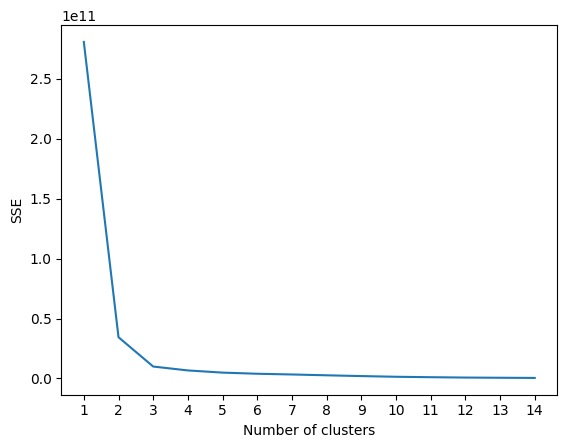

In [17]:
plt.plot(range(1, 15), sse)
plt.xticks(range(1, 15))
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()